# Práctica regresión lineal

**Nombre:** Rafael Isaac Cano Guitton


## Lectura de datos

Para los experimentos se escogió un conjunto de datos que se usa como ejemplo en varios posts de Towards Data Science y notebooks de Kaggle para hacer regresión lineal simple.
https://www.kaggle.com/code/amartyanambiar/study-hours-vs-marks/notebook.

Para la siguiente implementación se usan las siguientes librerías:
- **Numpy**
- **Pandas**

In [141]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("student_scores.csv")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Normalización de los datos
Seguidamente revisamos la distribución de nuestros datos.

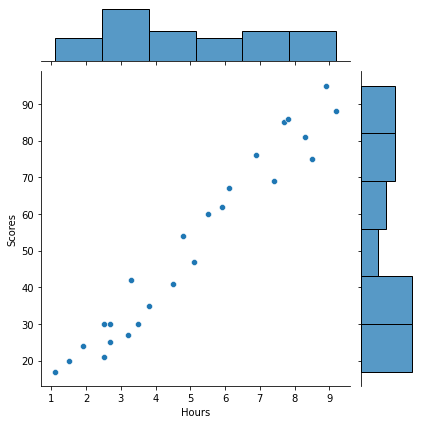

In [142]:
import seaborn as sns

sns.jointplot(data=dataset,x=dataset['Hours'],y=dataset['Scores'])

Aplicamos normalización sobre los datos.

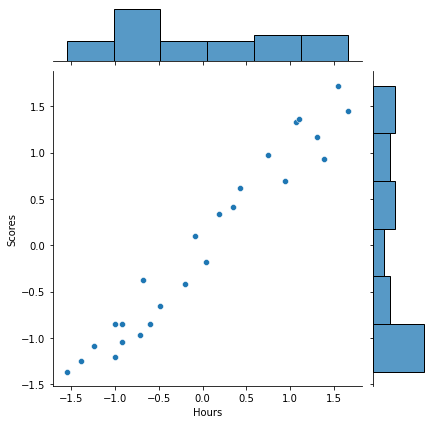

In [143]:
datasetNorm = (dataset - dataset.mean())/dataset.std()
sns.jointplot(data=datasetNorm,x=datasetNorm['Hours'],y=datasetNorm['Scores'])

## División de los datos
Seguidamente haremos la división de los datos con el criterio de usar el 70% para el entrenamiento y el 30% restante para la evaluación. Además también dividiremos el dataset en 30% entrenamiento y 70% evaluación para revisar el comportamiento que esto tenga. Para eso usaremos una función de la librería **sklearn**.

In [144]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(datasetNorm,test_size=0.3)
train2,test2 = train_test_split(datasetNorm,test_size=0.7)
train.head()

,Hours,Scores
10,1.064515,1.325588
3,1.381335,0.930126
21,-0.083957,0.099656
18,0.430875,0.613757
4,-0.598790,-0.849452


## Costo

In [145]:
matrix = np.array(train.values,'float')
x = matrix[:,0]
y = matrix[:,1]
y

array([ 1.32558823,  0.93012634,  0.09965639,  0.61375684, -0.84945212,
       -0.84945212, -1.04718306,  1.36513441,  0.4160259 , -0.96809069,
       -0.17716692,  1.44422679, -0.41444405,  0.69284922,  1.72105011,
       -0.37489786, -0.84945212])

In [146]:
#inicializando los parámetros
m = np.size(y)
x = x.reshape([m,1])
x_aux = np.hstack([np.ones_like(x),x])
theta = np.zeros([2,1])


def costo(x,y,theta):
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    return (a)*(b)
print(costo(x_aux,y,theta))

7.557830556540235


In [147]:
def gradient(x, y, theta):
    alpha = 0.00001
    iteration = 5000
    J_history = np.zeros([iteration, 1]);
    for iter in range(5000):
        error = (x @ theta) - y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:, 0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:, 1]))
        theta = np.array([temp0, temp1]).reshape(2, 1)
        # compute J value for each iteration
        J_history[iter] = (1 / (2*m)) * (np.sum(((x @ theta)-y)**2))
    return theta, J_history
theta , J = gradient(x_aux,y,theta)
print(theta)

[[0.0575114]
 [0.7018517]]


In [148]:
print(J)

[[ 7.55764707]
 [ 7.55746396]
 [ 7.55728124]
 ...
 [10.71543109]
 [10.71678422]
 [10.71813761]]


## Experimento 1

Calcular el error cuadrático medio y graficar.

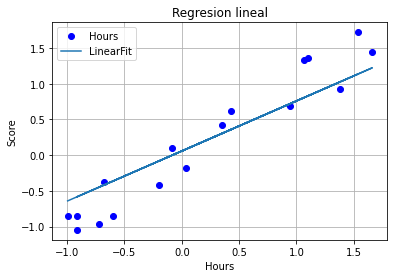

In [149]:
import matplotlib.pyplot as plt
#plot linear fit for our theta
plt.plot(x,y,'bo')
plt.plot(x,x_aux@theta,'-')
plt.ylabel('Score')
plt.xlabel('Hours')
plt.legend(['Hours','LinearFit'])
plt.title('Regresion lineal')
plt.grid()
plt.show()

In [150]:
# now we calculate the root mean square using the test set
matrix2 = np.array(test.values,'float')
x2 = matrix2[:,0]
y2 = matrix2[:,1]
y2

array([-1.08672925, -1.20536781,  1.16740347, -1.244914  ,  0.33693352,
        0.96967253, -1.36355257, -0.65172118])

Calculamos el error cuadrático medio para cada predicción.

In [151]:
def MSE(Yp,Y):
    tam =len(Y)
    return np.sum((Yp - Y)**2) / tam

y_predictions = []
for _ in range(len(y2)):
    predict1 = theta[0] + theta[1]*x2[_]
    y_predictions.append(predict1)
y_predictions
print(MSE(y_predictions,y2))


11.764737569174839


## Experimento 2



## Experimento 3

Invertir la división de datos, 30% entrenamiento y 70 prueba, indicar el error, realizar las gráficas y analizar la rpta con respecto al experimento 1.

In [152]:
matrix3 = np.array(train2.values,'float')
x3 = matrix3[:,0]
y3 = matrix3[:,1]
#inicializando los parámetros
m = np.size(y3)
x3 = x3.reshape([m,1])
x_aux = np.hstack([np.ones_like(x3),x3])
theta = np.zeros([2,1])


def costo(x,y,theta):
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    return (a)*(b)
print(costo(x_aux,y3,theta))

2.0814996767937948


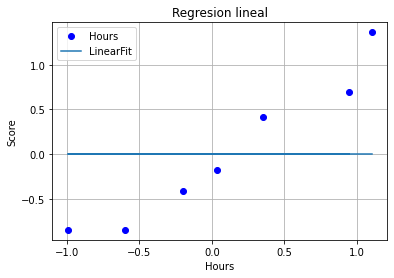

In [153]:
theta2, J2 = gradient(x_aux,y3,theta)
plt.plot(x3,y3,'bo')
plt.plot(x3,x_aux@theta,'-')
plt.ylabel('Score')
plt.xlabel('Hours')
plt.legend(['Hours','LinearFit'])
plt.title('Regresion lineal')
plt.grid()
plt.show()

## Conclusión

Como hemos podido observar, la regresión lineal nos puede ayudar a predecir ciertos comportamientos lineales pero puede no ser del todo efectivo usando pocos datos como en los presentes experimentos.